In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


most of the values are missing in unnamed 2-4 columns

In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
# missing values hai ki nahi 
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# checking for duplicate values 
df.duplicated().sum()

np.int64(403)

In [12]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.shape

(5572, 2)

# EDA

In [14]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fff4a17770>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59%'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41%')])

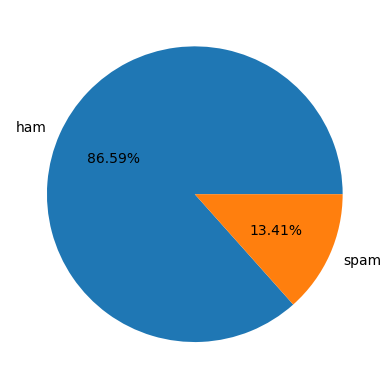

In [15]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")

In [16]:
import nltk

In [26]:
import nltk
nltk.download("punkt_tab")   # ye download karega required tokenizer


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Suraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [27]:
df['size'] = df['text'].apply(len)

In [28]:
df

,target,text,size
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [34]:
import nltk

df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df[['text','word_count']].head()

,text,word_count
0,"Go until jurong point, crazy.. Available only ...",24
1,Ok lar... Joking wif u oni...,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,U dun say so early hor... U c already then say...,13
4,"Nah I don't think he goes to usf, he lives aro...",15


In [35]:
df.head()

,target,text,size,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['sent_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [37]:
df

,target,text,size,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# Text Preprocessing